In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [102]:
data = pd.read_csv("train_adaboost.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data.drop(['PassengerId','Name','Ticket','Cabin'], inplace = True, axis = 1)

In [104]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [105]:
data['Sex'] = data['Sex'].map({'male':1,'female':0})

In [106]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [107]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [109]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
#data['Cabin'] = data['Cabin'].fillna(method = 'bfill', inplace = True)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

In [110]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [111]:
data.head()
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [113]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Embarked'] = data['Embarked'].astype(str)
data['Embarked']= label_encoder.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [123]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [125]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [126]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

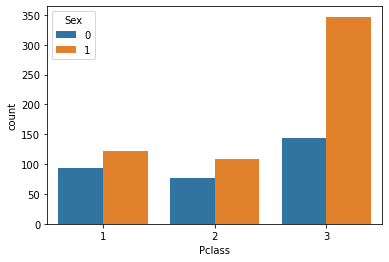

In [130]:
sns.countplot(data = data, hue = 'Sex',x = 'Pclass')

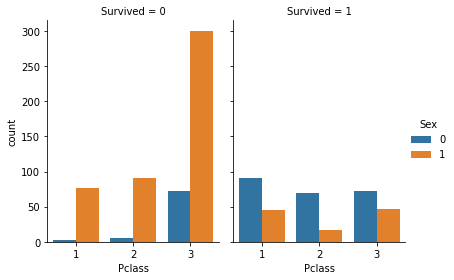

In [133]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.7);

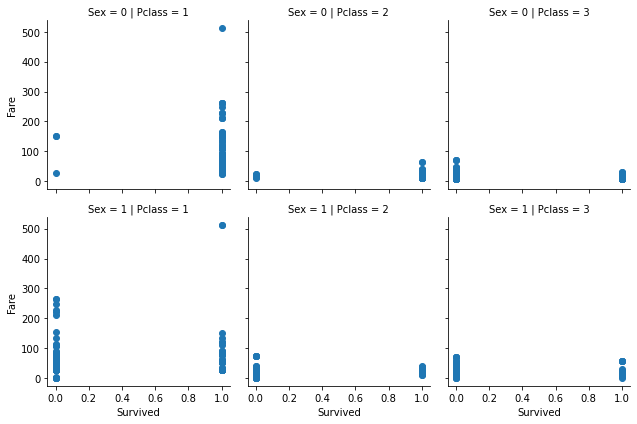

In [144]:
g = sns.FacetGrid(data, col = "Pclass", row = 'Sex',palette="Set1")
g  = g.map(plt.scatter, "Survived","Fare" )

In [154]:
# Adaboost
X = X
y = y
M=10
learning_rate = 1
y.shape
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [173]:
N = len(y)
estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]


#Initialize the sample weights
sample_weight = np.ones(N) / N
sample_weight_list.append(sample_weight.copy())

In [156]:
sample_weight_list

[array([0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00112233, 0.00112233,
        0.00112233, 0.00112233, 0.00112233, 0.00

In [174]:
for m in range(M):   

    #Fit a classifier
    estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
    estimator.fit
    estimator.fit(X, y, sample_weight=sample_weight)
    y_predict = estimator.predict(X)
    
    #Misclassifications
    incorrect = (y_predict != y)
    
    #Estimator error
    estimator_error = np.mean(np.average(incorrect, weights=sample_weight, axis=0))
    
    #Boost estimator weights
    estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)
    
    #Boost sample weights
    sample_weight *= np.exp(estimator_weight)
    
    #Save iteration values
    estimator_list.append(estimator)
    y_predict_list.append(y_predict.copy())
    estimator_error_list.append(estimator_error.copy())
    estimator_weight_list.append(estimator_weight.copy())
    sample_weight_list.append(sample_weight.copy())
    
    
#Convert to np array for convenience   
estimator_list = np.asarray(estimator_list)
y_predict_list = np.asarray(y_predict_list)
estimator_error_list = np.asarray(estimator_error_list)
estimator_weight_list = np.asarray(estimator_weight_list)
sample_weight_list = np.asarray(sample_weight_list)

#Predictions
preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
print('Accuracy = ', (preds == y).sum() / N) 

print(estimator_list, estimator_weight_list, sample_weight_list)


Accuracy =  0.7867564534231201
[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=